<a href="https://colab.research.google.com/github/sachinra0805/sachinra0805/blob/main/Q1_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import pandas as pd

In [89]:
df = pd.read_csv("1.CRESCENT SET.CKD.csv")

In [90]:
df.head()

,week,cluster_id,brand,prod_brick,sales_units,per_unit_grossprice,per_unit_netprice,per_unit_discountprice,discount_per,promo_week_flg,age,week_no,year_no
0,9.2013,1,CRESCENT SET,CKD,436,953.587156,861.639060,91.948096,0.096423,0,1,9,2013
1,10.2013,1,CRESCENT SET,CKD,1015,934.763547,879.627212,55.136335,0.058984,0,2,10,2013
2,11.2013,1,CRESCENT SET,CKD,1101,897.828338,844.544133,53.284205,0.059348,0,3,11,2013
3,12.2013,1,CRESCENT SET,CKD,1495,946.424749,862.167739,84.257010,0.089027,0,4,12,2013
4,13.2013,1,CRESCENT SET,CKD,1684,935.372803,805.363432,130.009371,0.138992,0,5,13,2013


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   week                    114 non-null    float64
 1   cluster_id              114 non-null    int64  
 2   brand                   114 non-null    object 
 3   prod_brick              114 non-null    object 
 4   sales_units             114 non-null    int64  
 5   per_unit_grossprice     114 non-null    float64
 6   per_unit_netprice       114 non-null    float64
 7   per_unit_discountprice  114 non-null    float64
 8   discount_per            114 non-null    float64
 9   promo_week_flg          114 non-null    int64  
 10  age                     114 non-null    int64  
 11  week_no                 114 non-null    int64  
 12  year_no                 114 non-null    int64  
dtypes: float64(5), int64(6), object(2)
memory usage: 11.7+ KB


In [9]:
import datetime
from dateutil.relativedelta import relativedelta

def dateseries(week, year):
  date = datetime.date(year, 1, 1) + relativedelta(weeks=+week)
  return(date)

In [92]:
df['dateseries'] = df.apply(lambda row : datetime.date(row['year_no'], 1, 1) + relativedelta(weeks=+row['week_no']),  axis = 1)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   week                    114 non-null    float64
 1   cluster_id              114 non-null    int64  
 2   brand                   114 non-null    object 
 3   prod_brick              114 non-null    object 
 4   sales_units             114 non-null    int64  
 5   per_unit_grossprice     114 non-null    float64
 6   per_unit_netprice       114 non-null    float64
 7   per_unit_discountprice  114 non-null    float64
 8   discount_per            114 non-null    float64
 9   promo_week_flg          114 non-null    int64  
 10  age                     114 non-null    int64  
 11  week_no                 114 non-null    int64  
 12  year_no                 114 non-null    int64  
 13  dateseries              114 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory 

In [94]:
df['dateseries'] = pd.to_datetime(df['dateseries'])

In [95]:
df.drop(["week", "week_no", "year_no"], axis = 1 , inplace = True)

In [96]:
df.drop(["cluster_id", "brand", "prod_brick"], axis = 1 , inplace = True)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   sales_units             114 non-null    int64         
 1   per_unit_grossprice     114 non-null    float64       
 2   per_unit_netprice       114 non-null    float64       
 3   per_unit_discountprice  114 non-null    float64       
 4   discount_per            114 non-null    float64       
 5   promo_week_flg          114 non-null    int64         
 6   age                     114 non-null    int64         
 7   dateseries              114 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 7.2 KB


In [98]:
df.index = df['dateseries']

In [99]:
df.drop(["dateseries"], axis = 1 , inplace = True)

In [46]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [100]:
df.head()

,sales_units,per_unit_grossprice,per_unit_netprice,per_unit_discountprice,discount_per,promo_week_flg,age
dateseries,,,,,,,
2013-03-05,436,953.587156,861.639060,91.948096,0.096423,0,1
2013-03-12,1015,934.763547,879.627212,55.136335,0.058984,0,2
2013-03-19,1101,897.828338,844.544133,53.284205,0.059348,0,3
2013-03-26,1495,946.424749,862.167739,84.257010,0.089027,0,4
2013-04-02,1684,935.372803,805.363432,130.009371,0.138992,0,5


In [101]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,10)

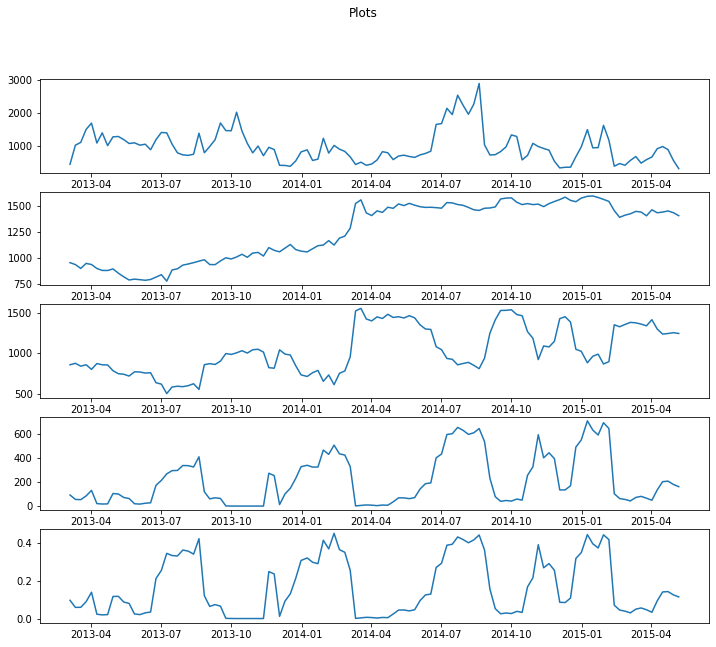

In [102]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5)
fig.suptitle('Plots')
ax1.plot(df['sales_units'])
ax2.plot(df['per_unit_grossprice'])
ax3.plot(df['per_unit_netprice'])
ax4.plot(df['per_unit_discountprice'])
ax5.plot(df['discount_per'])

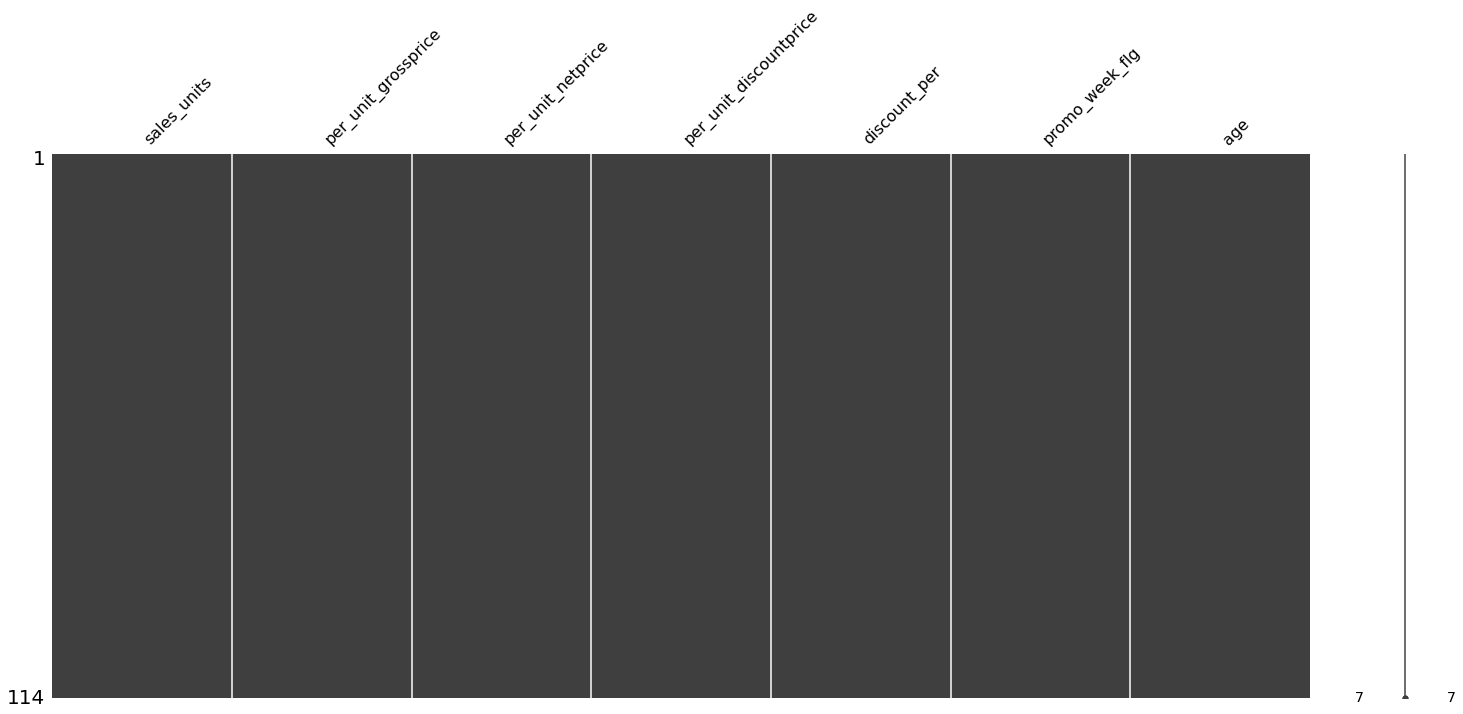

In [103]:
import missingno as msno
msno.matrix(df)

In [41]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [ ]:
sn.histplot(df['sales_units'], kde = True)
plt.show()
sn.histplot(df['per_unit_grossprice'], kde = True)
plt.show()
sn.histplot(df['per_unit_netprice'], kde = True)
plt.show()
sn.histplot(df['per_unit_discountprice'], kde = True)
plt.show()
sn.histplot(df['discount_per'], kde = True)
plt.show()
sn.histplot(df['promo_week_flg'], kde = True)
plt.show()

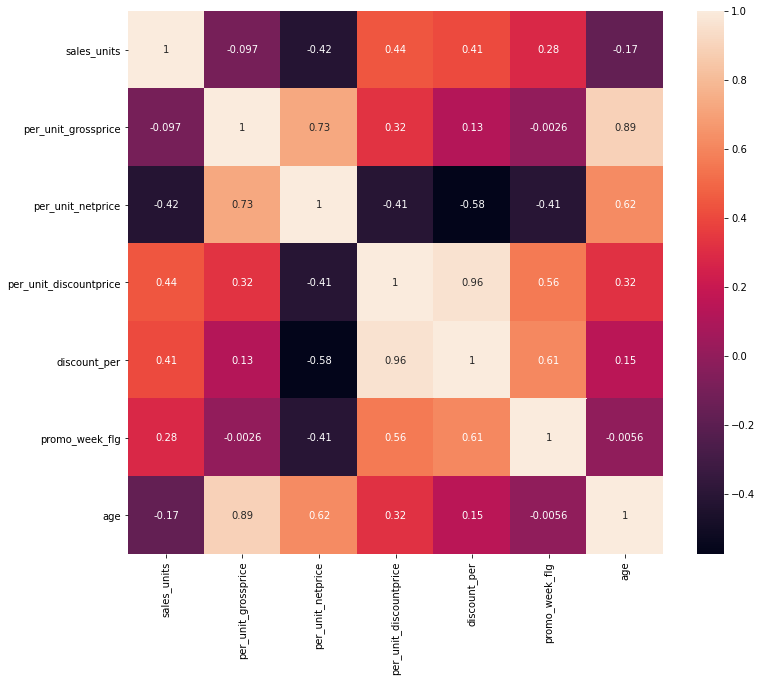

In [105]:
varcorr = df.corr()
sn.heatmap(varcorr, xticklabels=varcorr.columns, yticklabels=varcorr.columns, annot=True)

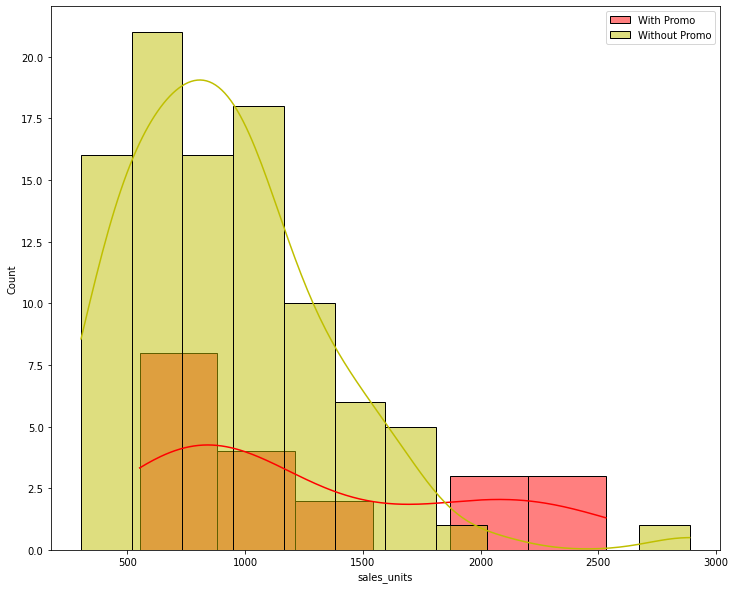

In [106]:
sn.histplot(df[df['promo_week_flg'] ==1]['sales_units'], color = 'r', label = 'With Promo', kde = True)
sn.histplot(df[df['promo_week_flg'] ==0]['sales_units'], color = 'y', label = 'Without Promo',kde = True)
plt.legend();

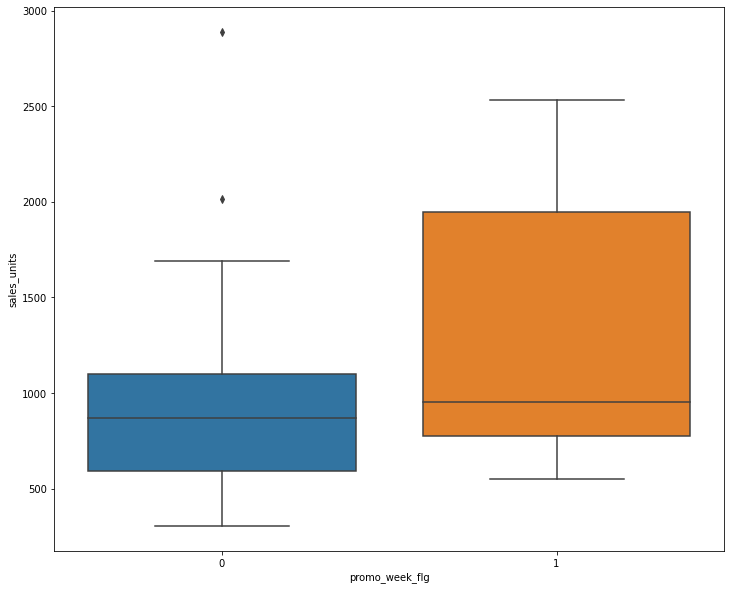

In [83]:
sn.boxplot(x = 'promo_week_flg', y = 'sales_units', data = df)

In [107]:
main_features = ['sales_units','per_unit_grossprice','per_unit_netprice','per_unit_discountprice','discount_per','age']

In [ ]:
sn.pairplot(df[main_features], size = 2)

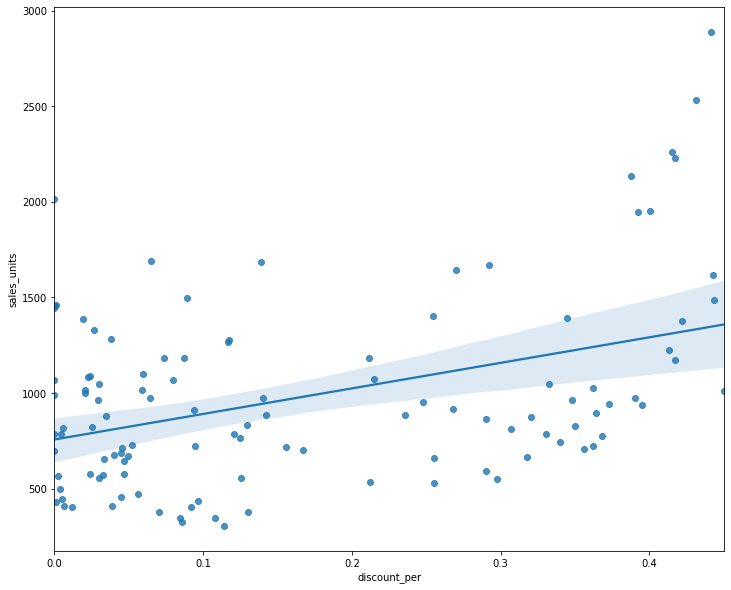

In [124]:
sn.regplot(x = 'discount_per', y = 'sales_units', data = df)

In [110]:
df.describe()

,sales_units,per_unit_grossprice,per_unit_netprice,per_unit_discountprice,discount_per,promo_week_flg,age
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,978.824561,1255.458788,1041.306178,214.152610,0.166433,0.175439,57.500000
std,491.584511,277.018807,287.927052,208.767938,0.150556,0.382021,33.052988
min,303.000000,775.334475,508.244252,0.000000,0.000000,0.000000,1.000000
25%,662.000000,983.294323,821.327467,48.657248,0.033437,0.000000,29.250000
50%,882.500000,1409.128276,990.220586,133.978640,0.111264,0.000000,57.500000
75%,1182.750000,1505.371172,1336.545546,336.150452,0.314883,0.000000,85.750000
max,2888.000000,1596.457647,1553.043360,706.711251,0.450161,1.000000,114.000000


In [118]:
bins = [0.033437, 0.111264, 0.314883, 0.450161]
labels = [1,2,3]
df['binned'] = pd.cut(df['discount_per'], bins=bins, labels=labels)
print (df)

            sales_units  per_unit_grossprice  ...  age  binned
dateseries                                    ...             
2013-03-05          436           953.587156  ...    1       1
2013-03-12         1015           934.763547  ...    2       1
2013-03-19         1101           897.828338  ...    3       1
2013-03-26         1495           946.424749  ...    4       1
2013-04-02         1684           935.372803  ...    5       2
...                 ...                  ...  ...  ...     ...
2015-04-09          909          1434.003520  ...  110       1
2015-04-16          974          1440.864251  ...  111       2
2015-04-23          882          1451.800771  ...  112       2
2015-04-30          555          1434.989369  ...  113       2
2015-05-07          303          1406.223102  ...  114       2

[114 rows x 8 columns]


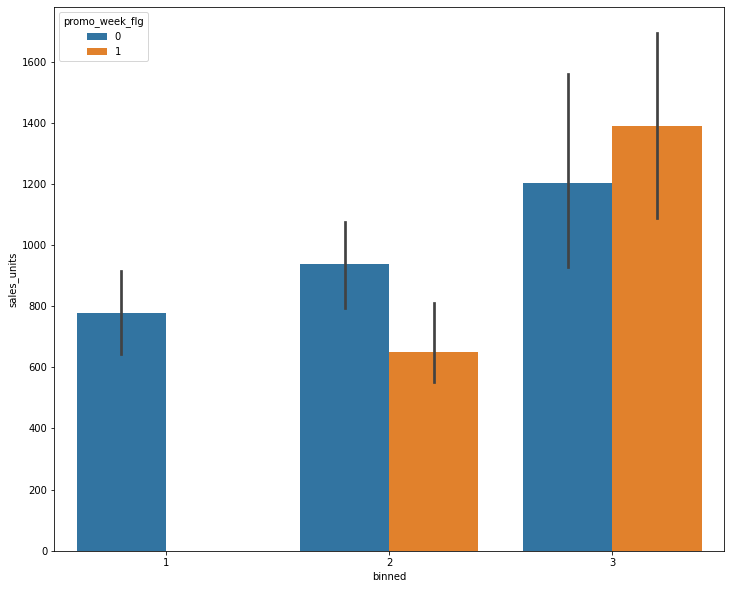

In [126]:
sn.barplot(x= 'binned', y = 'sales_units', hue='promo_week_flg', data = df)

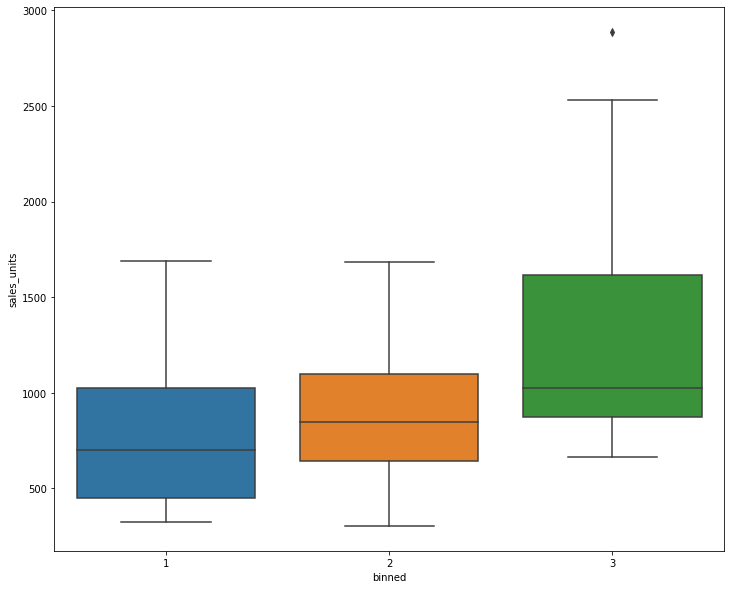

In [127]:
sn.boxplot(x = 'binned', y = 'sales_units', data = df)